In [1]:
#Import
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import scipy.stats as stats

# **Stractegic Plan of Action:**

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:
*italicized text*
Data Exploration

1.   Exploratory Data Analysis (EDA)
2.   Data Pre-processing
3.   Data Manipulation
4.   Feature Selection/Extraction
5.   Predictive Modelling
6.   Project Outcomes & Conclusion









# 1.Data Exploration

In [2]:
uploaded=files.upload()

Saving diamonds.csv to diamonds.csv


In [3]:
df=pd.read_csv('diamonds.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

**A data frame with 53940 rows and 10 variables:**

**price**: price in US dollars (\$326--\$18,823)

**carat**: weight of the diamond (0.2--5.01)

**cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: diamond colour, from J (worst) to D (best)

**clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x**: length in mm (0--10.74)

**y**: width in mm (0--58.9)

**z**: depth in mm (0--31.8)

**depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table**: width of top of diamond relative to widest point (43--95)

In [5]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
#Editing column headers
df.rename(columns={'depth':'Total_Depth_Percnt','x':'length','y':'width','z':'depth'},inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns=map(str.capitalize, df.columns)




In [7]:
df

,Carat,Cut,Color,Clarity,Total_depth_percnt,Table,Price,Length,Width,Depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
#check null values 
null_data=df.isnull()
null_data.head()

,Carat,Cut,Color,Clarity,Total_depth_percnt,Table,Price,Length,Width,Depth
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [9]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Cut                       5
Color                     7
Clarity                   8
Table                   127
Total_depth_percnt      184
Carat                   273
Depth                   375
Width                   552
Length                  554
Price                 11602
dtype: int64

In [10]:
#Checking Column Quality 
for i in null_data.columns.values.tolist():
    print(i)
    print(null_data[i].value_counts())
    print("----------------------------------")

Carat
False    53940
Name: Carat, dtype: int64
----------------------------------
Cut
False    53940
Name: Cut, dtype: int64
----------------------------------
Color
False    53940
Name: Color, dtype: int64
----------------------------------
Clarity
False    53940
Name: Clarity, dtype: int64
----------------------------------
Total_depth_percnt
False    53940
Name: Total_depth_percnt, dtype: int64
----------------------------------
Table
False    53940
Name: Table, dtype: int64
----------------------------------
Price
False    53940
Name: Price, dtype: int64
----------------------------------
Length
False    53940
Name: Length, dtype: int64
----------------------------------
Width
False    53940
Name: Width, dtype: int64
----------------------------------
Depth
False    53940
Name: Depth, dtype: int64
----------------------------------


**Feature Classification: Categorical vs Numerical**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Carat               53940 non-null  float64
 1   Cut                 53940 non-null  object 
 2   Color               53940 non-null  object 
 3   Clarity             53940 non-null  object 
 4   Total_depth_percnt  53940 non-null  float64
 5   Table               53940 non-null  float64
 6   Price               53940 non-null  int64  
 7   Length              53940 non-null  float64
 8   Width               53940 non-null  float64
 9   Depth               53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Categorical Features**: Cut, Color, Clarity

**Numerical Features**: Carat, Total_Depth, Table, Price, Length, Width, Depth

**Distribution of Numerical Features values across the samples**

In [12]:
df.describe()

,Carat,Total_depth_percnt,Table,Price,Length,Width,Depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Distribution of Categorical Features**

In [13]:
df.describe(include=['object'])

,Cut,Color,Clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [14]:
#Last check on df
df

,Carat,Cut,Color,Clarity,Total_depth_percnt,Table,Price,Length,Width,Depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# 2.EDA

# Data Visualization


**Correlating Categorical Features**

***Cut***

In [15]:
df['Cut'].value_counts().to_frame()

,Cut
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [16]:
df['Cut'].value_counts(normalize=True).to_frame()

,Cut
Ideal,0.399537
Premium,0.255673
Very Good,0.223990
Good,0.090953
Fair,0.029848


'Fair' is 2%, 'Good' is 9%, 'Very Good' is 22%, 'Premium' is 25%, and 'Ideal' is 39%. There is an imbalance but not severe

<Axes: xlabel='Cut', ylabel='count'>

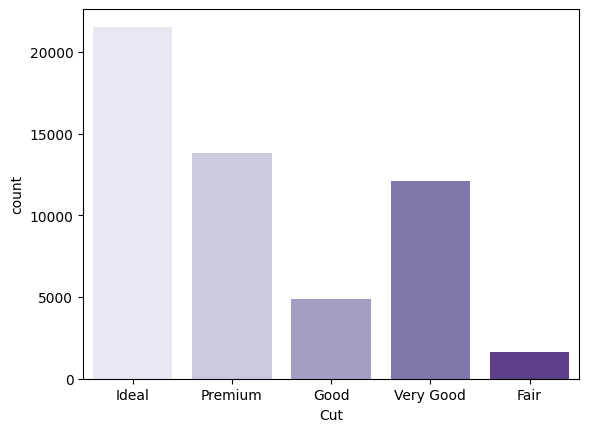

In [17]:
sns.countplot(data=df,x='Cut',palette='Purples')

***Color***

In [18]:
df['Color'].value_counts().to_frame()

,Color
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [19]:
df['Color'].value_counts(normalize=True).to_frame

<bound method Series.to_frame of G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: Color, dtype: float64>

'J' is 5%, 'I' is 10%, 'H' is 15%, 'G' is ~21%, 'F' is 17%, 'E' is 18%, 'D' is 12%. There aren't any significant gaps.

<Axes: xlabel='Color', ylabel='count'>

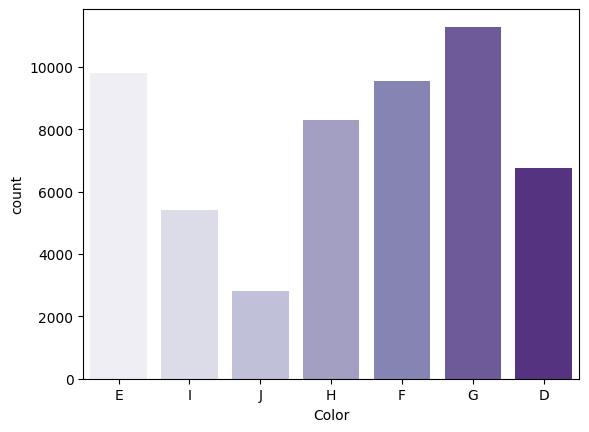

In [20]:
sns.countplot(data=df,x='Color',palette='Purples')

***Clarity***

In [21]:
df['Clarity'].value_counts().to_frame()

,Clarity
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [22]:
df['Clarity'].value_counts(normalize=True).to_frame()

,Clarity
SI1,0.242214
VS2,0.227253
SI2,0.170449
VS1,0.151483
VVS2,0.093919
VVS1,0.067760
IF,0.033185
I1,0.013737


'I1' is 1%, 'SI2' is 17%, 'SI1' is 24%, 'VS2' is 22%, 'VS1' is 15%, 'VVS2' is 9%, 'VVS1' is 6%, 'IF' is 3%. There is an imbalance but not severe

<Axes: xlabel='Clarity', ylabel='count'>

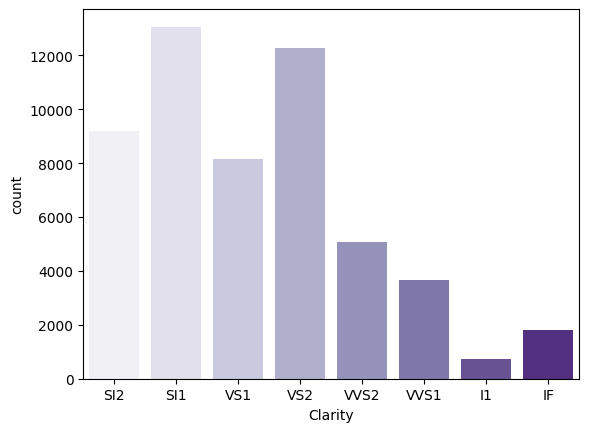

In [23]:
sns.countplot(data=df,x='Clarity',palette='Purples')



*   Categorical Features in a Nutshell



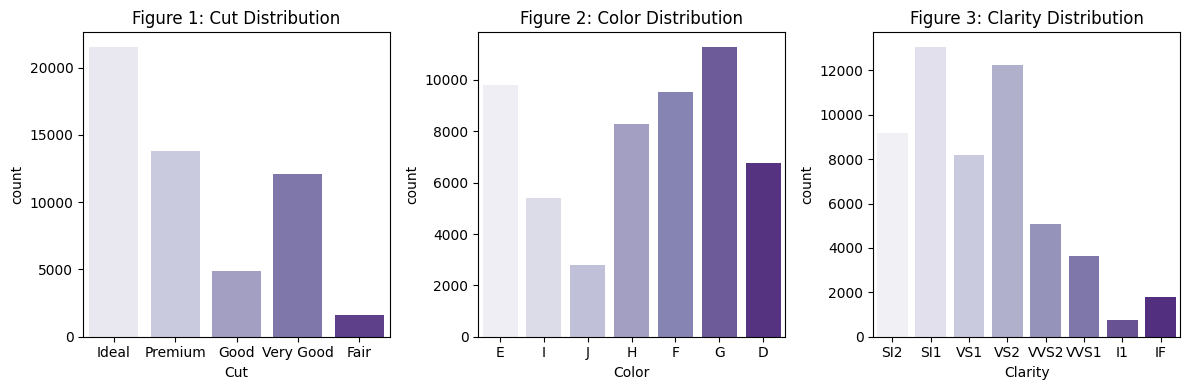

In [24]:
ccols=['Cut','Color','Clarity']

n_rows=1
n_cols=3
fig,ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*4, n_rows*4))

for r in range (0,n_rows):
  for c in range(0,n_cols):
    i=r*n_cols+c
    if i < len(ccols):
      ax_i=ax[c]
      sns.countplot(data=df,x=ccols[i],palette='Purples',ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: {ccols[i]} Distribution")

plt.tight_layout()

**Correlating Numerical Features**

**Numerical Features**: Carat, Total_Depth, Table, Price, Length, Width, Depth

**Carat**

In [25]:
df['Carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: Carat, dtype: float64

<Axes: xlabel='Carat', ylabel='Count'>

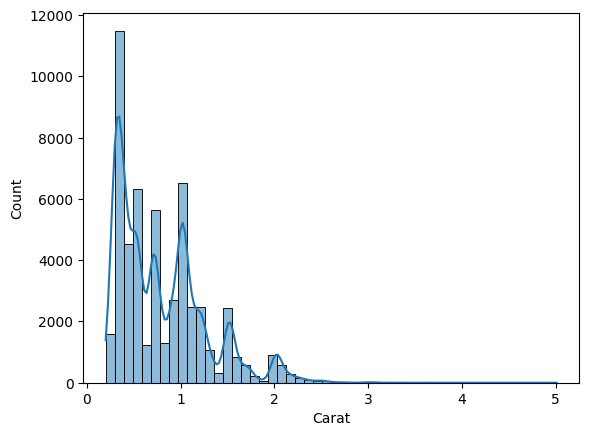

In [26]:
sns.histplot(data=df,x='Carat',bins=50,kde=True)

*Most of sold diamonds' carat are from 0.2-2*










**Total_Dept_Percnt**

In [27]:
df['Total_depth_percnt'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: Total_depth_percnt, dtype: float64

<Axes: xlabel='Total_depth_percnt', ylabel='Count'>

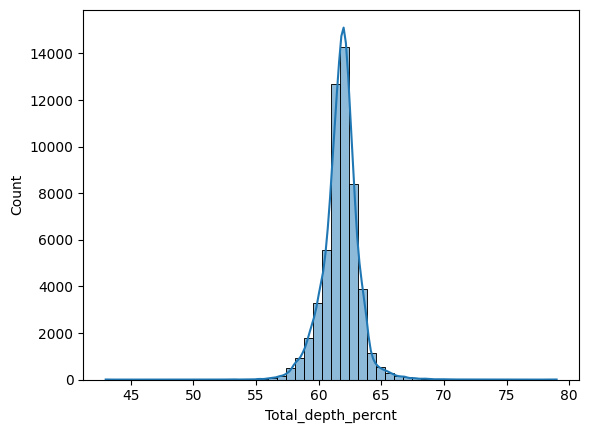

In [28]:
sns.histplot(data=df,x='Total_depth_percnt',bins=50,kde=True)

*Most of sold damonds have total depth percentage around 58-68*

**Table**

In [29]:
df['Table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: Table, dtype: float64

<Axes: xlabel='Table', ylabel='Count'>

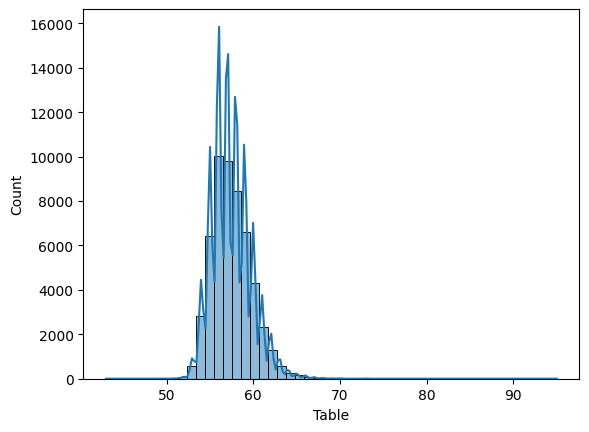

In [30]:
sns.histplot(data=df,x='Table',bins=50,kde=True)

*Most of sold diamonds have 'Table' around 65-73*

**Length**

In [31]:
df['Length'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: Length, dtype: float64

<Axes: xlabel='Length', ylabel='Count'>

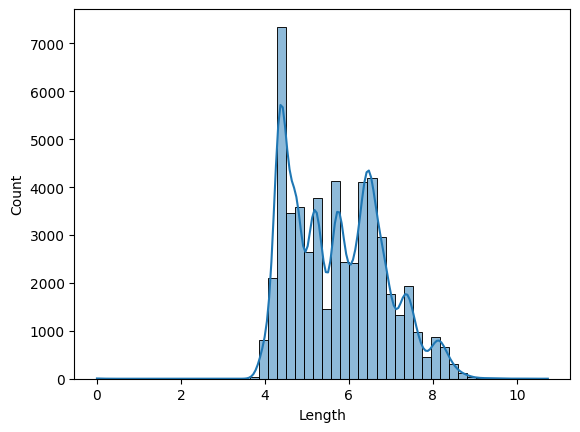

In [32]:
sns.histplot(data=df,x='Length',bins=50,kde=True)

*Most of sold diamonds have length between 4-8*

**Width**

In [33]:
df['Width'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: Width, dtype: float64

<Axes: xlabel='Width', ylabel='Count'>

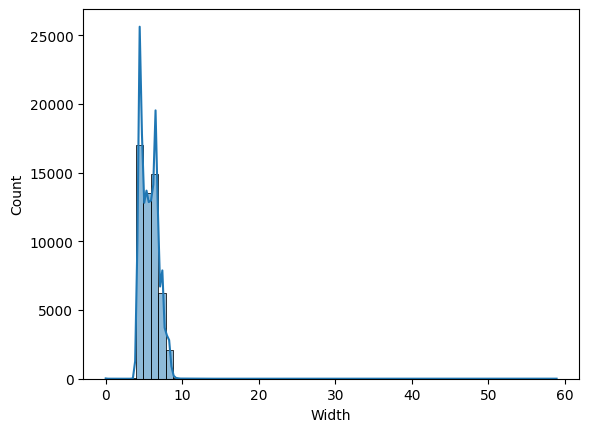

In [34]:
sns.histplot(data=df,x='Width',bins=60,kde=True)

*Most of sold diamonds have width between 5-10*

**Depth**


In [35]:
df['Depth'].describe()

count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: Depth, dtype: float64

<Axes: xlabel='Depth', ylabel='Count'>

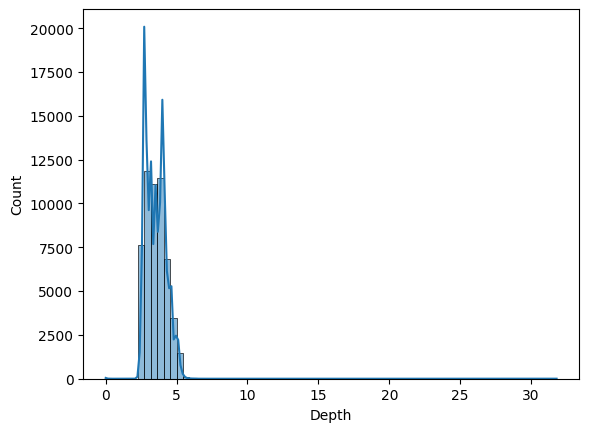

In [36]:
sns.histplot(data=df,x='Depth',bins=70,kde=True)

*Most of sold diamonds have depth between 3-5*

**Numerical Features Summary**

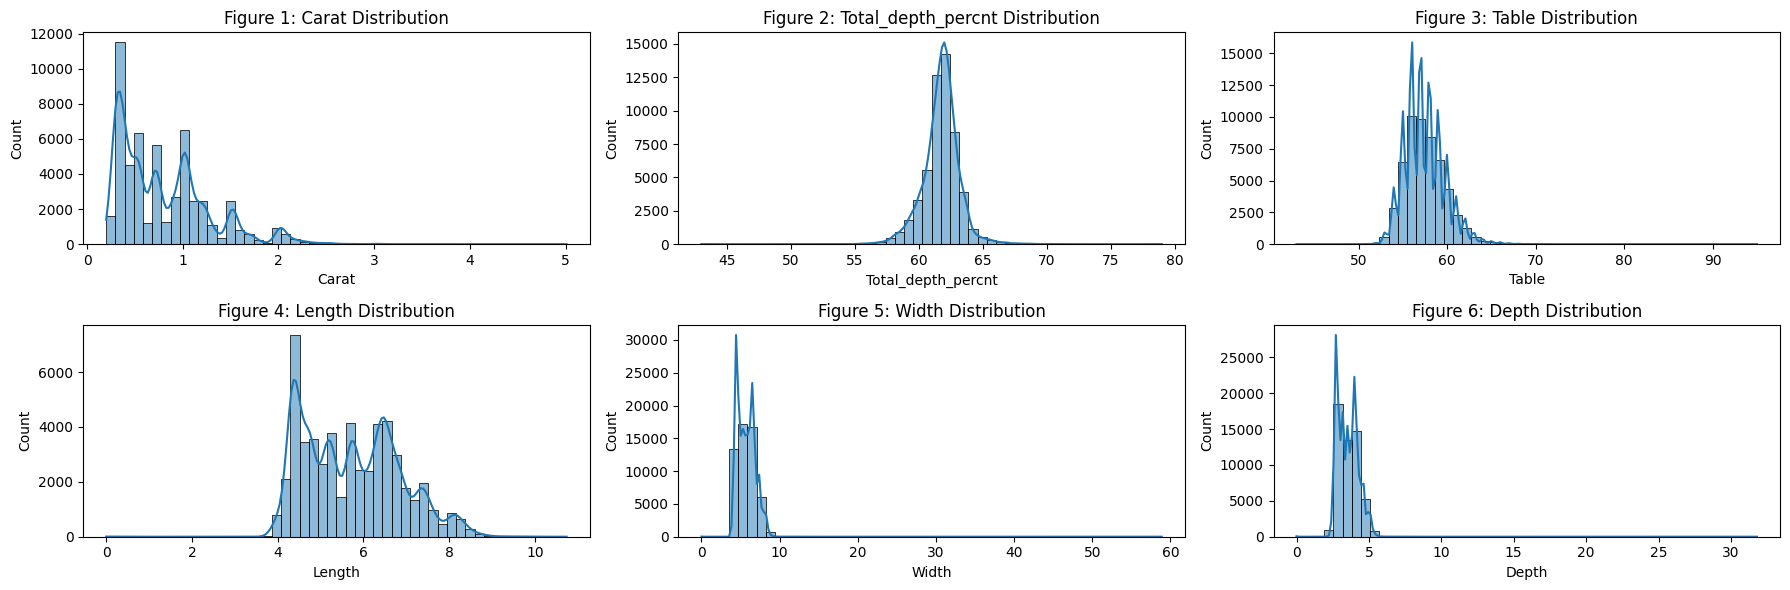

In [37]:
cols=['Carat','Total_depth_percnt','Table','Length','Width','Depth']

nb_rows=2
nb_cols=3
fig,ax=plt.subplots(nb_rows,nb_cols,figsize=(n_cols*6, n_rows*6))

for r in range (0,nb_rows):
  for c in range(0,nb_cols):
    i=r*nb_cols+c
    if i < len(cols):
      ax_i=ax[r,c]
      sns.histplot(data=df,x=cols[i],ax=ax_i, bins=50,kde=True)
      ax_i.set_title(f"Figure {i+1}: {cols[i]} Distribution")

plt.tight_layout()

# **3.Data Correlation Check and Data Selection**

**Selecting Features correlating with 'Price'(p_value>0.7)**

# **Numerical Features**

***Carat***

In [38]:
df[['Carat','Price']].corr()

,Carat,Price
Carat,1.000000,0.921591
Price,0.921591,1.000000


<Axes: xlabel='Carat', ylabel='Price'>

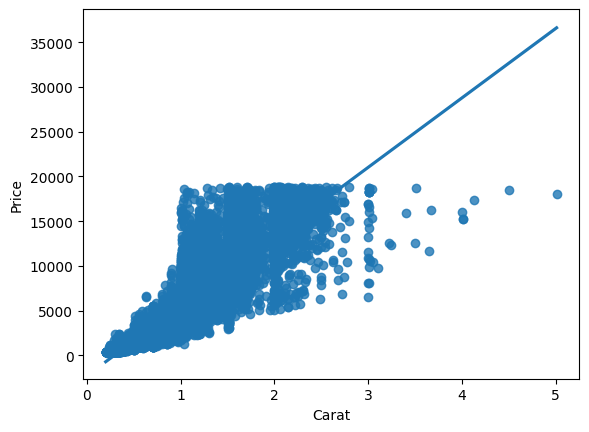

In [39]:
sns.regplot(x='Carat',y='Price',data=df)

***Total Depth Percentage***

In [40]:
df[['Total_depth_percnt','Price']].corr()

,Total_depth_percnt,Price
Total_depth_percnt,1.000000,-0.010647
Price,-0.010647,1.000000


<Axes: xlabel='Total_depth_percnt', ylabel='Price'>

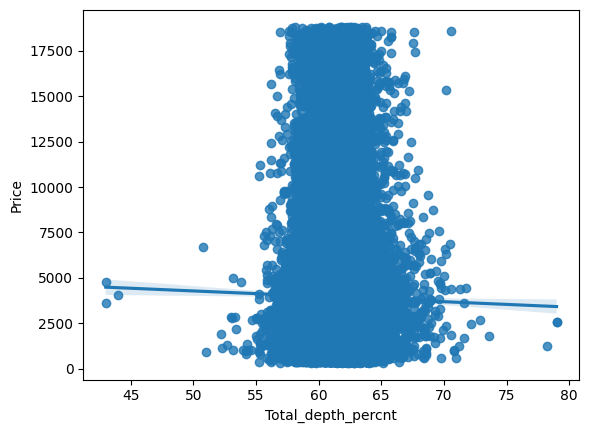

In [41]:
sns.regplot(x='Total_depth_percnt',y='Price',data=df)

***Table***

In [42]:
df[['Table','Price']].corr()

,Table,Price
Table,1.000000,0.127134
Price,0.127134,1.000000


<Axes: xlabel='Table', ylabel='Price'>

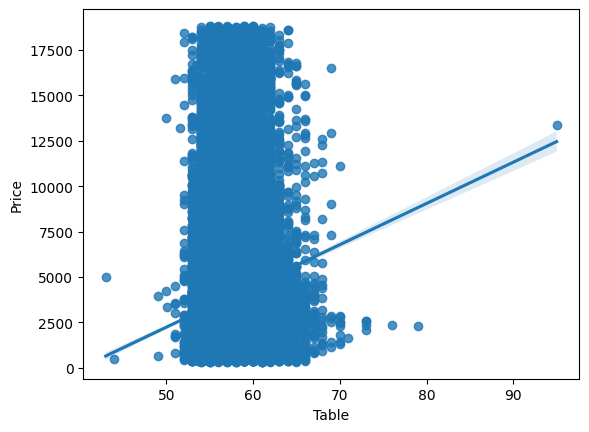

In [43]:
sns.regplot(x='Table',y='Price',data=df)

***Length***

In [44]:
df[['Length','Price']].corr()

,Length,Price
Length,1.000000,0.884435
Price,0.884435,1.000000


<Axes: xlabel='Length', ylabel='Price'>

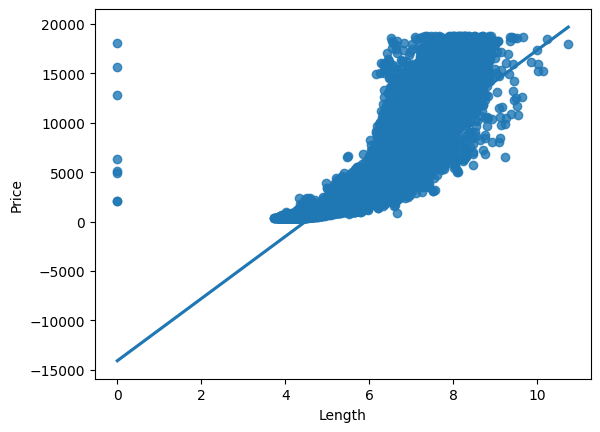

In [45]:
sns.regplot(x='Length',y='Price',data=df)

***Width***

In [46]:
df[['Width','Price']].corr()

,Width,Price
Width,1.000000,0.865421
Price,0.865421,1.000000


<Axes: xlabel='Width', ylabel='Price'>

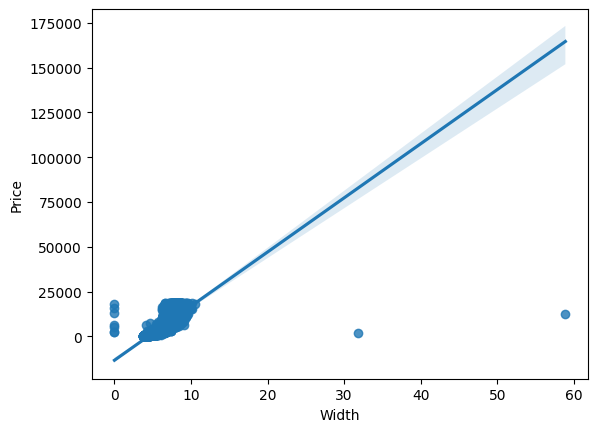

In [47]:
sns.regplot(x='Width',y='Price',data=df)

***Depth***

In [48]:
df[['Depth','Price']].corr()

,Depth,Price
Depth,1.000000,0.861249
Price,0.861249,1.000000


<Axes: xlabel='Depth', ylabel='Price'>

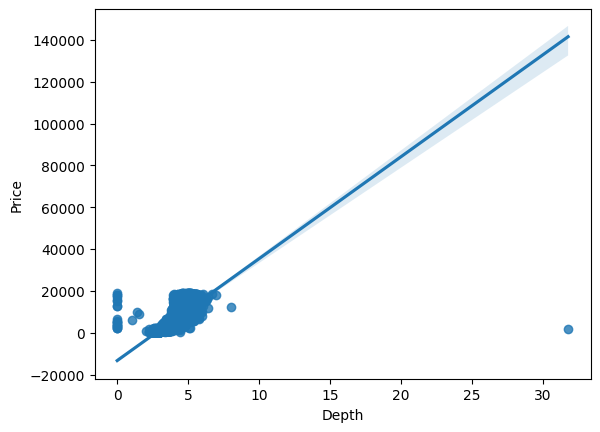

In [49]:
sns.regplot(x='Depth',y='Price',data=df)

***Numerical Features in a nutshell ***

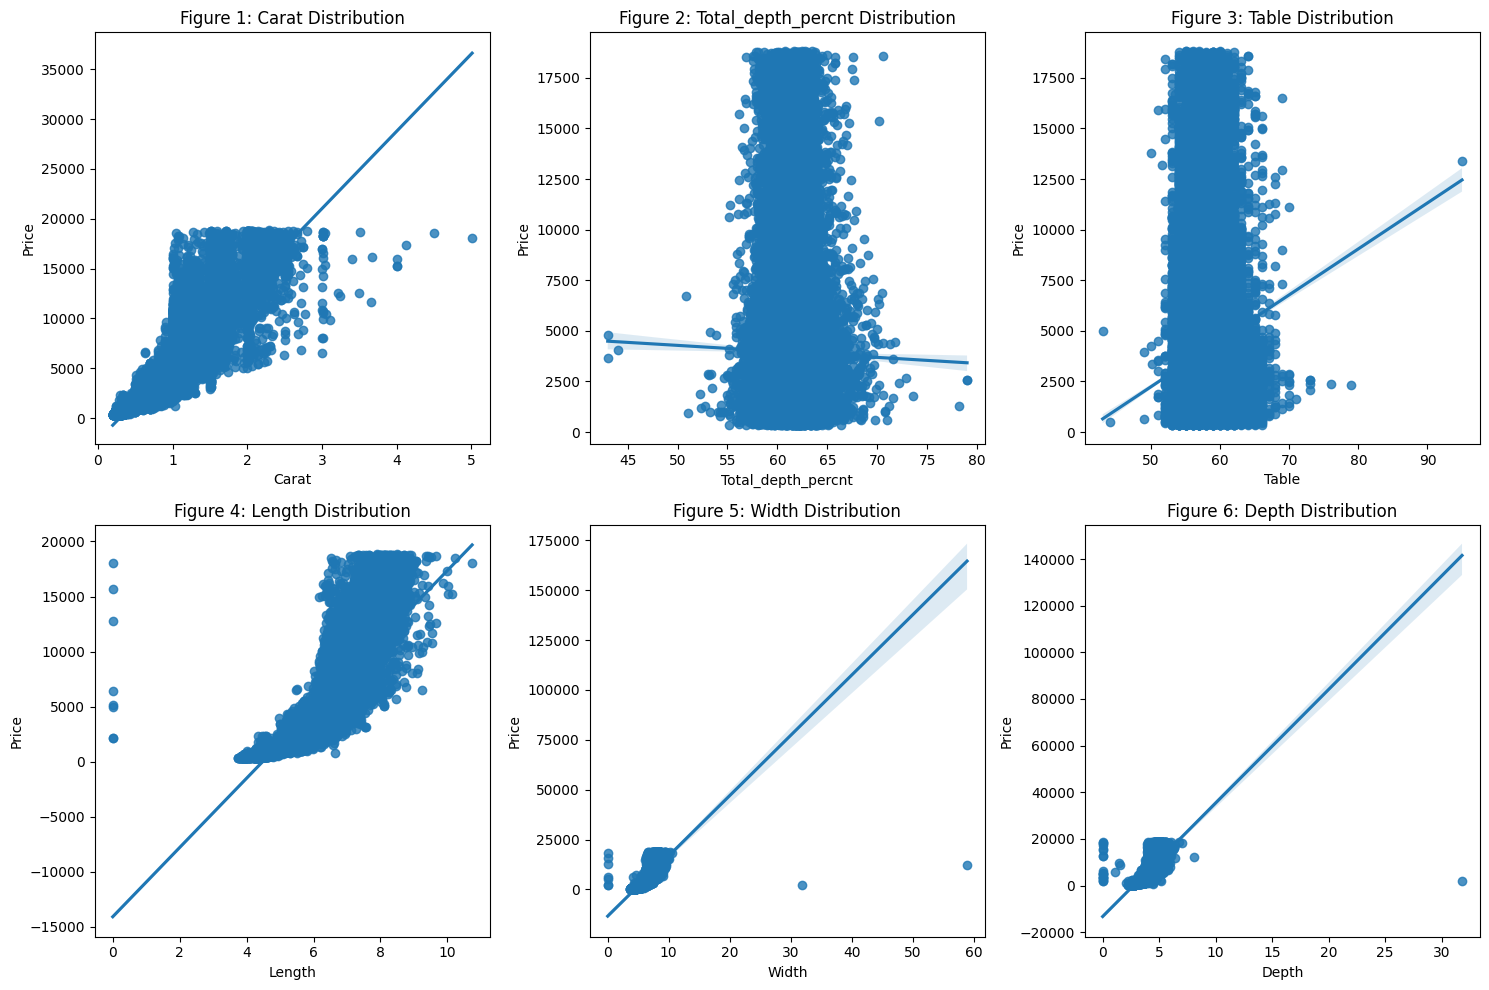

In [50]:
cols=['Carat','Total_depth_percnt','Table','Length','Width','Depth']

nb_rows=2
nb_cols=3
fig,ax=plt.subplots(nb_rows,nb_cols,figsize=(nb_cols*5, nb_rows*5))

for r in range (0,nb_rows):
  for c in range(0,nb_cols):
    i=r*nb_cols+c
    if i < len(cols):
      ax_i=ax[r,c]
      sns.regplot(data=df,x=cols[i],y='Price',ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: {cols[i]} Distribution")

plt.tight_layout()

# **Categorical Feature**

***Cut***

In [51]:
df[['Cut','Price']].corr()

<ipython-input-51-7a1638ba745b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Cut','Price']].corr()


,Price
Price,1.0


<Axes: xlabel='Cut', ylabel='Price'>

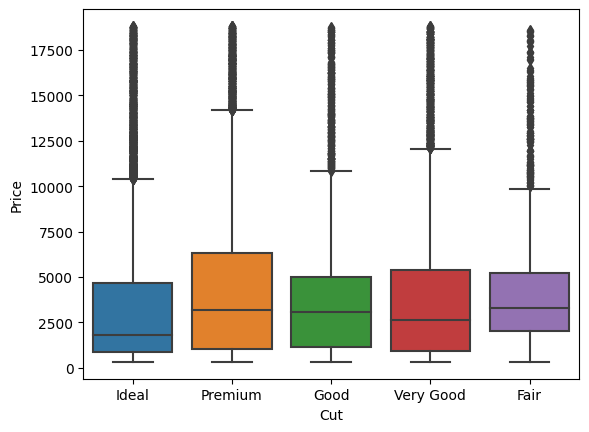

In [52]:
sns.boxplot(x='Cut',y='Price',data=df)

***Color***

In [53]:
df[['Color','Price']].corr()

<ipython-input-53-8803c7d04fad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Color','Price']].corr()


,Price
Price,1.0


<Axes: xlabel='Color', ylabel='Price'>

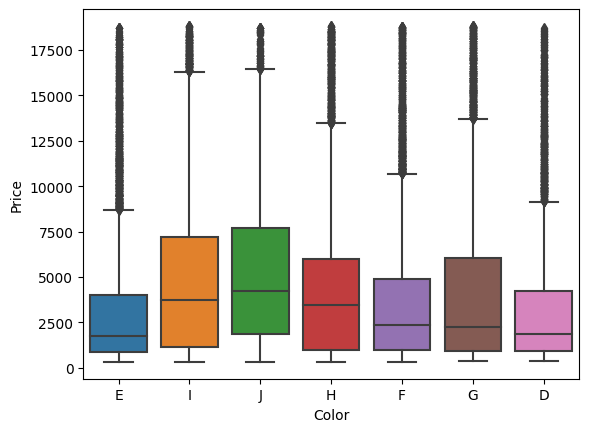

In [54]:
sns.boxplot(x='Color',y='Price',data=df)

***Clarity***

In [55]:
df[['Clarity','Price']].corr()

<ipython-input-55-5f3f6d718527>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Clarity','Price']].corr()


,Price
Price,1.0


<Axes: xlabel='Clarity', ylabel='Price'>

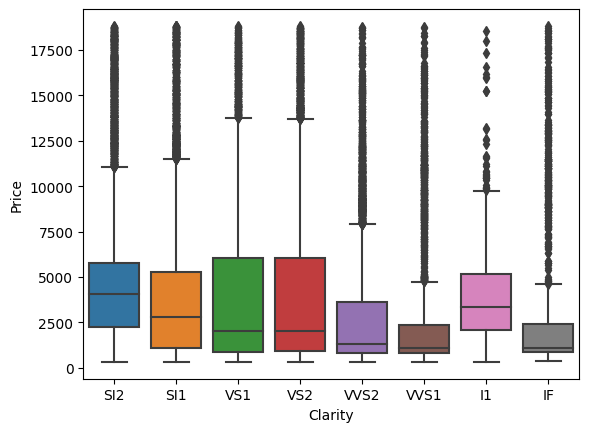

In [56]:
sns.boxplot(x='Clarity',y='Price',data=df)

*** Categorical Features in a nutshell ***

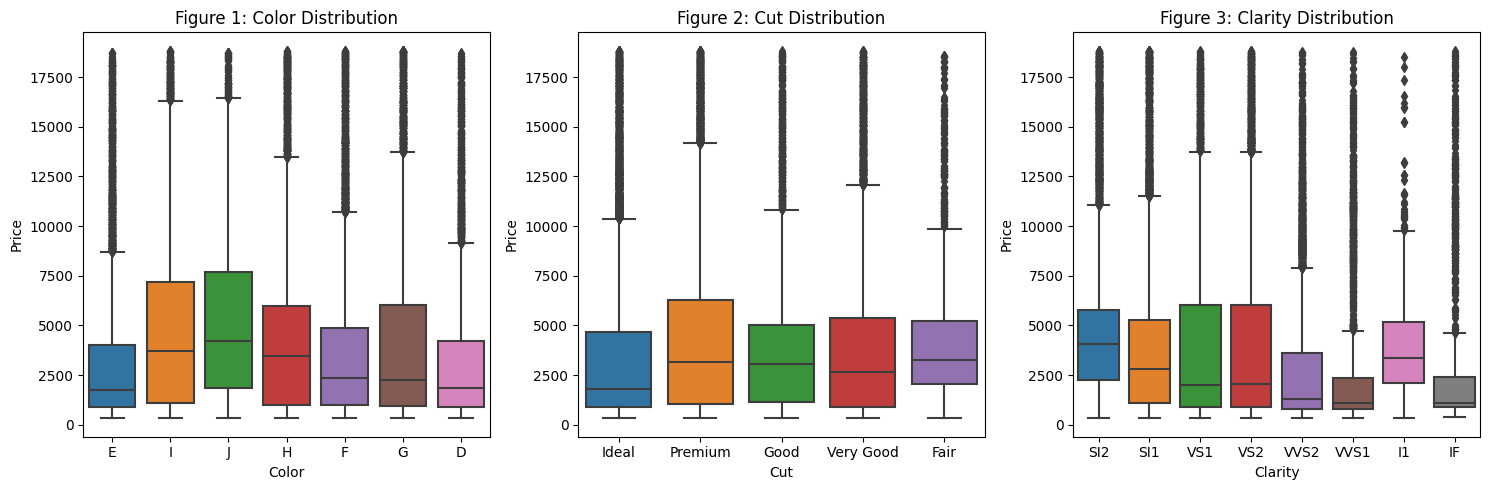

In [57]:
cols=['Color','Cut','Clarity']

nb_rows=1
nb_cols=3
fig,ax=plt.subplots(nb_rows,nb_cols,figsize=(nb_cols*5, nb_rows*5))

for r in range (0,nb_rows):
  for c in range(0,nb_cols):
    i=r*nb_cols+c
    if i < len(cols):
      ax_i=ax[c]
      sns.boxplot(data=df,x=cols[i],y='Price',ax=ax_i)
      ax_i.set_title(f"Figure {i+1}: {cols[i]} Distribution")

plt.tight_layout()

# **Detecting and Deleting Outliers**

In [58]:
fea=['Carat','Total_depth_percnt','Length','Width','Depth']

for i in fea:
    max=df[i].quantile(0.99)
    min=df[i].quantile(0.01)
    df.drop(df[df[i]>max].index,inplace=True)
    df.drop(df[df[i]<min].index,inplace=True)

# **Pearson Coefficient and P Value**

In [59]:
#p-value is < 0.001 : correlation is very significant
#p-value is < 0.05: correlation is significant
#p-value is < 0.1: the correlation is weakly significant
#p-value is > 0.1: no evidence that the correlation is significant

***Carat***

In [60]:
pearson_coef, p_value = stats.pearsonr(df['Carat'], df['Price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.9041766970700218  while P-value is  0.0


***Total Depth Percentage***

In [61]:
person_coef, p_value= stats.pearsonr(df['Total_depth_percnt'],df['Price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.9041766970700218  while P-value is  1.0880802246615809e-07


***Table***

In [62]:
pearson_coef,p_value= stats.pearsonr(df['Table'],df['Price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.12584840986213688  while P-value is  7.616847107124435e-173


***Length***

In [63]:
pearson_coef,p_value= stats.pearsonr(df['Length'],df['Price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8724256241354263  while P-value is  0.0


***Width***

In [64]:
pearson_coef,p_value= stats.pearsonr(df['Width'],df['Price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8739734553230565  while P-value is  0.0


***Depth***

In [65]:
pearson_coef,p_value= stats.pearsonr(df['Depth'],df['Price'])
print("Correlation Coefficient is", pearson_coef, " while P-value is ", p_value)

Correlation Coefficient is 0.8695381844811798  while P-value is  0.0


# 4. Feature Engineering and Data Pre-Processing

**Turning Categorical Features to Numerical Features**

***Cut Feature***

In [66]:
df['Cut'].unique()

array(['Premium', 'Good', 'Ideal', 'Very Good', 'Fair'], dtype=object)

In [67]:
df['Cut']=df['Cut'].replace('Fair',int(0)).replace('Good',int(1)).replace('Very Good',int(2)).replace('Premium',int(3)).replace('Ideal',int(4))


***Color***

In [68]:
df['Color'].unique()

array(['I', 'J', 'E', 'H', 'F', 'D', 'G'], dtype=object)

In [69]:
df['Color']=df['Color'].replace('J',int(0)).replace('I',int(1)).replace('H',int(2)).replace('G',int(3)).replace('F',int(4)).replace('E',int(5)).replace('D',int(6))

***Clarity***

In [70]:
df['Clarity'].unique()

array(['VS2', 'SI2', 'SI1', 'I1', 'VS1', 'VVS1', 'VVS2', 'IF'],
      dtype=object)

In [71]:
df['Clarity']=df['Clarity'].replace('I1',int(0)).replace('SI2',int(1)).replace('SI1',int(2)).replace('VS2',int(3)).replace('VS1',int(4)).replace('VVS2',int(5)).replace('VVS1',int(6)).replace('I1',int(7)).replace('IF',int(8))

##  5.Model  Building

In [72]:
#Seperate the target variable
y=df['Price']

#Remove the target variable and any irrelevant features
x=df.drop(['Price','Table'],axis=1)

#Feature Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


#Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)


#Create a Linear Regression Object
regressor= LinearRegression()

#Train the model using the training sets
regressor.fit(x_train,y_train)

#Make predictions using the testing set
y_pred=regressor.predict(x_test)




**Model Evaluation**

In [73]:
#RMSE
rmse=mean_squared_error(y_test,y_pred)
print('Root Mean squared error:',rmse)

#R2Score
r2score=r2_score(y_test,y_pred)
print('R-squared score:',r2score)

#Calculate the predicted values and the residuals
y_pred=regressor.predict(x_test)
residuals=y_test-y_pred

#Calculate the variance and standard deviation of the residuals
variance=np.var(residuals)
std_dev=np.std(residuals)

print('Variance of residuals:',variance)
print('Standard deviation of residuals:',std_dev)

Root Mean squared error: 1158201.3584785124
R-squared score: 0.9008127564820837
Variance of residuals: 1158089.8103085475
Standard deviation of residuals: 1076.1458127542696


In [74]:
print('The full R-square is : ',regressor.score(x_scaled,y))
print('The train R-square is : ',regressor.score(x_train,y_train))
print('The test R-square is : ',regressor.score(x_test,y_test))


The full R-square is :  0.9010914794031136
The train R-square is :  0.9011568404984076
The test R-square is :  0.9008127564820837


<ipython-input-75-eaea98e61935>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 50000],[0, 50000],'k-',color='r')


<function matplotlib.pyplot.show(close=None, block=None)>

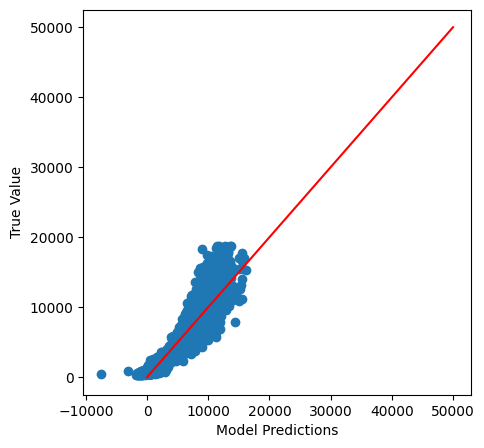

In [75]:
plt.figure(figsize=(5,5))
plt.scatter(y_pred,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 50000],[0, 50000],'k-',color='r')
plt.show

<ipython-input-76-432a3a721bb2>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test,hist=False,color="r",
<ipython-input-76-432a3a721bb2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regressor.predict(x_test),hist=False,color="b",


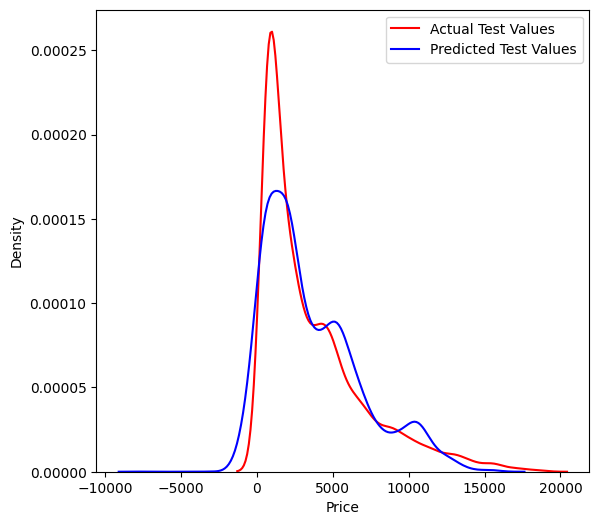

In [76]:
#Plot prediction and actual results
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

ax = sns.distplot(y_test,hist=False,color="r",
                 label="Actual Test Values")
sns.distplot(regressor.predict(x_test),hist=False,color="b",
           label="Predicted Test Values",ax=ax)

plt.legend()

plt.show()

In [77]:
intercept=regressor.intercept_
intercept

3597.5349626369457

In [78]:
slope=regressor.coef_
slope

array([ 5634.36689323,   128.44565484,   555.77341069,   764.80853745,
         365.01989016,  -858.5503552 ,  2706.10346106, -4094.47419925])

In [79]:
print("Price =  5634.36 x Carat + 128.44 x Cut + 555.77 x Color + 764.80 x Clarity +365.01 x Total Depth Percentage -858.55 x Length + 2706.10 x Width -4094.47 x Depth + 3597.53")

Price =  5634.36 x Carat + 128.44 x Cut + 555.77 x Color + 764.80 x Clarity +365.01 x Total Depth Percentage -858.55 x length + 2706.10 x width -4094.47 x depth + 3597.53
